In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import time
from IPython.display import display, Math

## With same function as before: deriving the symbolic derivative

Function:
\begin{gather*}
f(x) = exp(x)-x^2+cos(x)
\end{gather*}

Manually derived derivative:
\begin{gather*}
f^\prime (x) = exp(x)-2x-sin(x)
\end{gather*}

In [2]:
# function 
f = lambda x: np.exp(x) - x**2 + np.cos(x)

# function with sympy instead of numpy (sympy: symbolically (can manipulate expressions), numpy: numerically)
f_sym = lambda x: sp.exp(x) - x**2 + sp.cos(x)

# manual diff
diff_f = lambda x: np.exp(x) - 2*x - np.sin(x)

# numerical diff
num_diff_f = lambda x, h: (f(x+h)-f(x))/h

In [3]:
symb_x = sp.symbols('x')
symb_f = f_sym(symb_x)
symb_f

-x**2 + exp(x) + cos(x)

## Find derivative symbolically

Manually derived derivative:
\begin{gather*}
f^\prime (x) = exp(x)-2x-sin(x)
\end{gather*}

Symbolically derived derivative:

In [4]:
# derive derivative
div = symb_f.diff(symb_x)
div

-2*x + exp(x) - sin(x)

## Let' check the computation time

In [5]:
x = np.arange(0,5,1)

In [6]:
time1 = time.time()
symb_y = sp.lambdify(symb_x,symbolic_f)(x)
time2 = time.time()

tot_t = time2-time1 

NameError: name 'symbolic_f' is not defined

In [ ]:
# Duration of deriving the deviation symbolically
print('Duration: t=', tot_t)

### Remember numerically

In [ ]:
h = 1

time1 = time.time()
num_diff = num_diff_f(x,h)
time2 = time.time()

tot_t_num = time2-time1

In [ ]:
display(Math(r'$t_{sym}$ - $t_{num} = %05f$' % (tot_t - tot_t_num)))

### How about different step sizes $h$

In [ ]:
h_mult = [1, 0.1, 0.01, 0.001, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

In [ ]:
time_diff = []

for i, hi in enumerate(h_mult):
    x = np.arange(0,5,hi)
    t1 = time.time()
    symb_y = sp.lambdify(symb_x,div)(x)
    t2 = time.time()
    print(t2-t1)
    time_diff.append(t2-t1)

In [ ]:
h = 1e-8
x = np.arange(0,5,h)

# symbolical derivative
time1 = time.time()
symb_y = sp.lambdify(symb_x,symb_f)(x)
time2 = time.time()

tot_t = time2-time1 


# numerical derivative
time1 = time.time()
num_diff = num_diff_f(x,h)
time2 = time.time()

tot_t_num = time2-time1

display(Math(r'$t_{sym}$ - $t_{num} = %05f$' % (tot_t - tot_t_num)))

## Plot symbolic function usind sympy

(array([], dtype=float64), array([], dtype=int32))

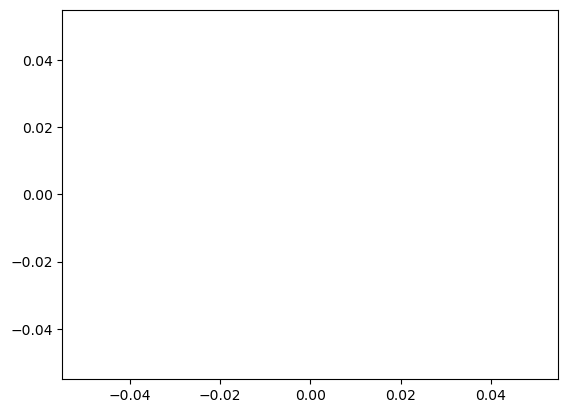

In [7]:
x = np.arange(0,5,-7)
symb_y = sp.lambdify(symb_x,symb_f)(x)
plt.plot(x,symb_y, marker = 'x')
symb_y,x

## Expression swell

Show expression swell of the symbolic derivative for the logistic map with $r=2$

\begin{gather*}
l_1 = x \\
l_{n+1} = r l_n (1- l_n)
\end{gather*}

In [8]:
# fuctions for n = 1,...,4
l1 = lambda x: x
l2 = lambda x: 2*l1(x)*(1-l1(x))
l3 = lambda x: 2*l2(x)*(1-l2(x))
l4 = lambda x: 2*l3(x)*(1-l3(x))

In [9]:
# the functions symbolicaly in respect to x
symb_l1 = l1(symb_x)
symb_l2 = l2(symb_x)
symb_l3 = l3(symb_x)
symb_l4 = l4(symb_x)

In [10]:
# derive derivative symbolically and the duration till derivative is determined
t1 = time.time()
diff_symb_l1 = symb_l1.diff(symb_x)
t2 = time.time()
diff_symb_l2 = symb_l2.diff(symb_x)
t3 = time.time()
diff_symb_l3 = symb_l3.diff(symb_x)
t4 = time.time()
diff_symb_l4 = symb_l4.diff(symb_x)
t5 = time.time()

# give out durations
print(t2-t1, t3-t2, t4-t3, t5-t4)

0.0010008811950683594 0.008997678756713867 0.019001483917236328 0.028001070022583008


In [11]:
symb_l1, diff_symb_l1

(x, 1)

In [12]:
display(Math(rf'f_1(x)={sp.latex(symb_l1)}'))
display(Math(rf'f^\prime_1(x)={sp.latex(diff_symb_l1)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
display(Math(rf'f_2(x)={sp.latex(symb_l2)}'))
display(Math(rf'f^\prime_2(x)={sp.latex(diff_symb_l2)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
display(Math(rf'f_3(x)={sp.latex(symb_l3)}'))
display(Math(rf'f^\prime_3(x)={sp.latex(diff_symb_l3)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
display(Math(rf'f_4(x)={sp.latex(symb_l4)}'))
display(Math(rf'f^\prime_4(x)={sp.latex(diff_symb_l4)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
h = 1e-7
x = np.arange(0,5,h)

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l1)(x)
time2 = time.time()

t1 = time2-time1

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l2)(x)
time2 = time.time()

t2 = time2-time1

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l3)(x)
time2 = time.time()

t3 = time2-time1

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l4)(x)
time2 = time.time()

t4 = time2-time1

In [17]:
t1, t2, t3, t4

(0.0009970664978027344,
 0.3450002670288086,
 4.490997314453125,
 19.733052492141724)

In [18]:
h = 1e-7
x = np.arange(0,5,h)

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l1)(x)
time2 = time.time()

t1 = time2-time1

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l2)(x)
time2 = time.time()

t2 = time2-time1

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l3)(x)
time2 = time.time()

t3 = time2-time1

time1 = time.time()
symb_y = sp.lambdify(symb_x,diff_symb_l4)(x)
time2 = time.time()

t4 = time2-time1

t1, t2, t3, t4

(0.04799795150756836,
 0.37900209426879883,
 4.143100261688232,
 17.217628240585327)

## Chain rule

In [19]:
#smbol that can present any (complex) number
symb_x = sp.symbols('x')

In [20]:
# with standard oparations from sympy instead of maths or numpy
def f_1(x):
    return sp.exp(x)

def f_2(x):
    return sp.sin(x) 

def f_3(x):
    return x**3 
    
# function with chain rule    
chain = f_1(f_2(f_3(symb_x)))

# derivative of funcion
chain_der = chain.diff(symb_x)

In [21]:
# print function
chain

exp(sin(x**3))

In [22]:
# print derivative of function
chain_der

3*x**2*exp(sin(x**3))*cos(x**3)

## Problem of control flow

In [23]:
def f_4(x):
    if x < 0:
        return x
    else:
        return x**3 - 20
    
try:
    f_4(symb_x)
except TypeError as error:
    print(error)

cannot determine truth value of Relational


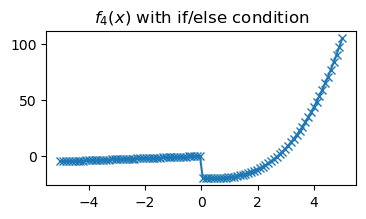

In [24]:
x = np.linspace(-5,5,100)
y = np.array([f_4(i) for i in x])

plt.figure(figsize = (4, 2))
plt.plot(x,y, marker = 'x')
plt.title(r'$f_4(x)$ with if/else condition')
plt.show()

In [25]:
# try symbolic differentiation
try:
    f_4.diff(symb_x)
except AttributeError as error:
    print(error)

'function' object has no attribute 'diff'


In [26]:
def f_5(x):
    while -2 < x < 2:
        return 50
    else:
        return x**3
    
try:
    f_5(symb_x)
except TypeError as error:
    print(error)

cannot determine truth value of Relational


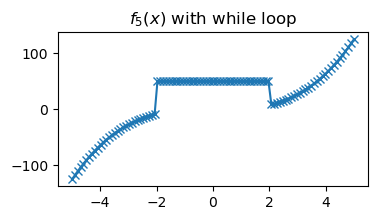

In [27]:
x = np.linspace(-5,5,100)
y = np.array([f_5(i) for i in x])

plt.figure(figsize = (4, 2))
plt.plot(x,y, marker = 'x')
plt.title(r'$f_5(x)$ with while loop')
plt.show()

In [28]:
# try symbolic differentiation
try:
    f_5.diff(symb_x)
except AttributeError as error:
    print(error)

'function' object has no attribute 'diff'


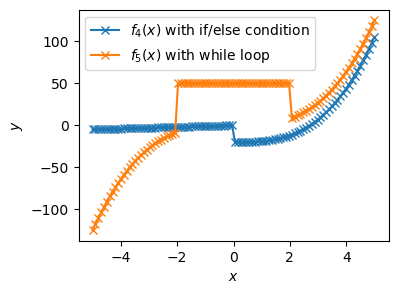

In [29]:
x = np.linspace(-5,5,100)
y1 = np.array([f_4(i) for i in x])
y2 = np.array([f_5(i) for i in x])

plt.figure(figsize = (4, 3))

plt.plot(x,y1, marker = 'x', label = r'$f_4(x)$ with if/else condition')
plt.plot(x,y2, marker = 'x', label = r'$f_5(x)$ with while loop')
plt.ylabel(r'$y$')
plt.xlabel('$x$')
plt.legend()
plt.show()